In [1]:
import os
import numpy as np

In [2]:
# 载入数据
from numpy import genfromtxt
train_dataset = genfromtxt('data/train.csv',delimiter=',')
val_dataset = genfromtxt('data/val.csv',delimiter=',')
test_data = genfromtxt('data/test_data.csv',delimiter=',')
train_data = train_dataset[1:,:4]
train_label = train_dataset[1:,4]
val_data = val_dataset[1:,:4]
val_label = val_dataset[1:,4]
test_data = test_data[1:,:]

In [3]:
# pij计算函数
def pij(A, i, j):
    if i == j:
        return 0
    else:
        normalization = 0
        for k in range(len(train_label)):
            if k != i:
                normalization += np.exp(-(np.linalg.norm(A * train_data[i] - A * train_data[k]) ** 2))
        return np.linalg.norm(A * train_data[i] - A * train_data[j])/normalization

In [4]:
# 梯度计算
def gradient(A):
    sum1 = np.zeros(4)
    for i in range(len(train_label)):
        sum2 = np.zeros(4)
        for k in range(len(train_label)):                  # 梯度结果后半部分
            if i != k:
                temp = train_data[i] - train_data[k]
                sum2 +=  pij(A, i, k) * temp * temp.T
        for j in range(len(train_label)):                  # 梯度结果前半部分
            if train_label[i] == train_label[j]:                
                delta_vector = train_data[i] - train_data[j]
                sum1 += pij(A, i, j) * (delta_vector * delta_vector.T - sum2)
    return 2 * A * sum1

In [5]:
# 梯度下降训练A
import time

delta = 1e-3
ita = 1e-5
A = np.ones(4)
iteration = 0
maxiter = 10
time_start = time.time()
while(True):
    d = gradient(A)
    A += ita * d
    time_iteration = time.time()
    print('iter %d：gradient = '%iteration)
    print(d)
    print('A =')
    print(A)
    print('time_used: %f' %(time_iteration - time_start))
    print('\n')
    if iteration >= maxiter or np.linalg.norm(d) < delta:
        break
    iteration += 1

time_end = time.time()
print('%s  %f s' % ("训练耗时为", (time_end - time_start)))
print(A)

iter 0：gradient = 
[ -67454.37365082   -9445.14223599 -216611.00841347  -31863.97310392]
A =
[ 0.32545626  0.90554858 -1.16611008  0.68136027]
time_used: 9.042042


iter 1：gradient = 
[ -9746.96035729  -3530.27404749 122118.58673263 -10451.39544514]
A =
[0.22798666 0.87024584 0.05507578 0.57684631]
time_used: 17.888053


iter 2：gradient = 
[ -44.39118878  -71.93640662  -62.38844381 -118.84070615]
A =
[0.22754275 0.86952647 0.0544519  0.57565791]
time_used: 26.786046


iter 3：gradient = 
[ -43.93559875  -71.27987665  -61.22688007 -117.72349847]
A =
[0.22710339 0.86881367 0.05383963 0.57448067]
time_used: 35.705076


iter 4：gradient = 
[ -43.48912076  -70.63541444  -60.09673712 -116.62757339]
A =
[0.2266685  0.86810732 0.05323866 0.5733144 ]
time_used: 44.696090


iter 5：gradient = 
[ -43.05147633  -70.0026749   -58.99687781 -115.55230381]
A =
[0.22623799 0.86740729 0.05264869 0.57215887]
time_used: 53.628106


iter 6：gradient = 
[ -42.62239844  -69.38132641  -57.92621701 -114.49708778]


In [6]:
# 验证函数
from collections import Counter
def verify_kNN(train_data, test_data, k, distance):
    if distance == 'Euclid':
        predict = np.zeros(len(test_data[:,0]))
        d = np.zeros(len(train_data[:,0]))
        for i in range(len(predict)):
            for j in range(len(d)):
                d[j] = np.linalg.norm(test_data[i,:] - train_data[j,:])
                idx = np.argsort(d)[:k]
                predict[i] = Counter(train_label[idx]).most_common(1)[0][0]
        return predict
    if distance == 'Mahalanobis':
        predict = np.zeros(len(test_data[:,0]))
        d = np.zeros(len(train_data[:,0]))
        for i in range(len(predict)):
            for j in range(len(d)):
                temp = test_data[i,:] - train_data[j,:]
                d[j] = np.linalg.norm(A * test_data[i,:] - A * train_data[j,:])
                idx = np.argsort(d)[:k]
                predict[i] = Counter(train_label[idx]).most_common(1)[0][0]
        return predict

In [7]:
# 测试集验证
predict = verify_kNN(train_data, test_data, 5, 'Mahalanobis')
print(predict)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [8]:
# 记录测试结果
import csv
with open("task2_test_ prediction.csv","w", newline="") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["index","label"])
    for i in range(len(predict)):
        writer.writerow([i,int(predict[i])])

[0.22414815 0.86399819 0.04985396 0.56653573]
[1.         1.         0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 1.
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.86666667 0.93333333 0.86666667 0.93333333 0.93333333 0.93333333
 0.86666667 0.8        0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333 0.66666667
 0.66666667 0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6     

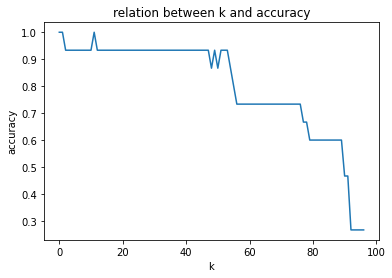

In [9]:
# 在验证集上考察k与精度的关系
import matplotlib.pyplot as plt
print(A)
acc = np.zeros(97)
for k in range(1, 98):
    predict = verify_kNN(train_data, val_data, k, 'Mahalanobis')
    acc[k-1] = np.sum(predict == val_label)/len(predict)
print(acc)
plt.plot(range(0,97), acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('relation between k and accuracy')
plt.show()